In [1]:
import pandas as pd


df = pd.read_csv("C:/Users/Alexander/Desktop/bestsellerss.csv")


print(df.head())


print(f"Розмір датасету: {df.shape}")


                                                Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating  Reviews  Price  Year        Genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  
Розмір датасету: (550, 7)


In [2]:
'''
В датасеті зберігається інформація про 550 книг.
'''

'\nВ датасеті зберігається інформація про 550 книг.\n'

In [3]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
print(df.columns)

Index(['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre'], dtype='object')


In [4]:
print(df.isna().sum())

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64


In [5]:
'''
Пропусків немає
'''

'\nПропусків немає\n'

In [6]:
print(df['genre'].unique())

['Non Fiction' 'Fiction']


In [7]:
'''
Унікальні жанри: 'Non Fiction' 'Fiction'
'''

"\nУнікальні жанри: 'Non Fiction' 'Fiction'\n"

<Axes: title={'center': 'Розподіл цін'}, ylabel='Frequency'>

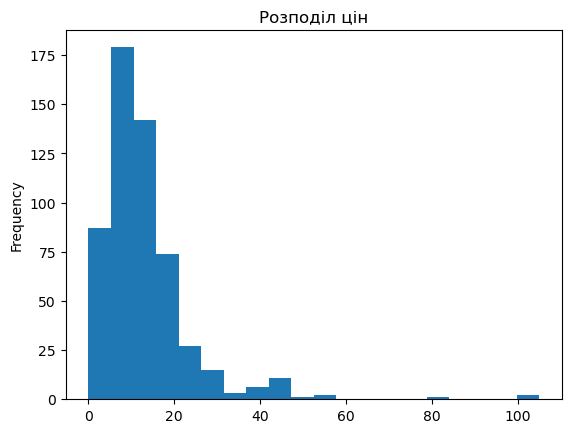

In [8]:
df['price'].plot(kind='hist', bins=20, title='Розподіл цін')


In [10]:
max_price = df['price'].max()
min_price = df['price'].min()
mean_price = df['price'].mean()
median_price = df['price'].median()
print(f"Максимальна ціна: {max_price}")
print(f"Мінімальна ціна: {min_price}")
print(f"Середня ціна: {mean_price}")
print(f"Медіанна ціна: {median_price}")

Максимальна ціна: 105
Мінімальна ціна: 0
Середня ціна: 13.1
Медіанна ціна: 11.0


In [11]:
# 1. Книга з найвищим рейтингом
max_rating = df['user_rating'].max()
books_with_max_rating = df[df['user_rating'] == max_rating]
num_books_with_max_rating = books_with_max_rating.shape[0]
print(f"Найвищий рейтинг: {max_rating}")
print(f"Кількість книг з найвищим рейтингом: {num_books_with_max_rating}")

Найвищий рейтинг: 4.9
Кількість книг з найвищим рейтингом: 52


In [12]:
# 2. Книга з найбільшою кількістю відгуків
max_reviews_book = df[df['reviews'] == df['reviews'].max()]['name'].iloc[0]
print(f"Книга з найбільшою кількістю відгуків: {max_reviews_book}")

Книга з найбільшою кількістю відгуків: Where the Crawdads Sing


In [13]:
# 3. Найдорожча книга серед тих, що потрапили до Топ-50 у 2015 році
df_2015 = df[df['year'] == 2015]
most_expensive_2015 = df_2015[df_2015['price'] == df_2015['price'].max()]['name'].iloc[0]
print(f"Найдорожча книга у 2015 році: {most_expensive_2015}")

Найдорожча книга у 2015 році: Publication Manual of the American Psychological Association, 6th Edition


In [14]:
# 4. Кількість книг жанру Fiction, що потрапили до Топ-50 у 2010 році
num_fiction_2010 = df[(df['genre'] == 'Fiction') & (df['year'] == 2010)].shape[0]
print(f"Кількість книг жанру Fiction у Топ-50 у 2010 році: {num_fiction_2010}")

Кількість книг жанру Fiction у Топ-50 у 2010 році: 20


In [15]:
# 5. Кількість книг з рейтингом 4.9, що потрапили до рейтингу у 2010 та 2011 роках
num_rating_4_9 = df[(df['user_rating'] == 4.9) & ((df['year'] == 2010) | (df['year'] == 2011))].shape[0]
print(f"Кількість книг з рейтингом 4.9 у 2010 та 2011 роках: {num_rating_4_9}")

Кількість книг з рейтингом 4.9 у 2010 та 2011 роках: 1


In [16]:
# 6. Відсортовані книги
sorted_books = df_2015[df_2015['price'] < 8].sort_values(by='price')
last_book = sorted_books.tail(1)['name'].iloc[0]
print(f"Книга, яка остання у відсортованому списку: {last_book}")

Книга, яка остання у відсортованому списку: Old School (Diary of a Wimpy Kid #10)


In [17]:
price_stats = df.groupby('genre')['price'].agg(['max', 'min'])
print(price_stats)


             max  min
genre                
Fiction       82    0
Non Fiction  105    0


In [18]:
author_books_count = df.groupby('author').agg({'name': 'count'}).rename(columns={'name': 'books_count'})
print(f"Розмірність таблиці: {author_books_count.shape}")
print(f"Автор з найбільшою кількістю книг: {author_books_count.idxmax()['books_count']}")
print(f"Кількість книг цього автора: {author_books_count.max()['books_count']}")

Розмірність таблиці: (248, 1)
Автор з найбільшою кількістю книг: Jeff Kinney
Кількість книг цього автора: 12


In [19]:
author_avg_rating = df.groupby('author').agg({'user_rating': 'mean'}).rename(columns={'user_rating': 'avg_rating'})
print(f"Автор з мінімальним середнім рейтингом: {author_avg_rating.idxmin()['avg_rating']}")
print(f"Середній рейтинг цього автора: {author_avg_rating.min()['avg_rating']}")

Автор з мінімальним середнім рейтингом: Donna Tartt
Середній рейтинг цього автора: 3.9


In [20]:
merged_df = pd.concat([author_books_count, author_avg_rating], axis=1)


In [21]:
sorted_df = merged_df.sort_values(by=['books_count', 'avg_rating'], ascending=[True, True])
print(f"Автор, який перший у списку: {sorted_df.index[0]}")

Автор, який перший у списку: Muriel Barbery


C:\Users\Alexander\AppData\Local\Temp\ipykernel_8396\252798901.py:27: UserWarning: Glyph 133 (\x85) missing from current font.
  plt.tight_layout()
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 133 (\x85) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


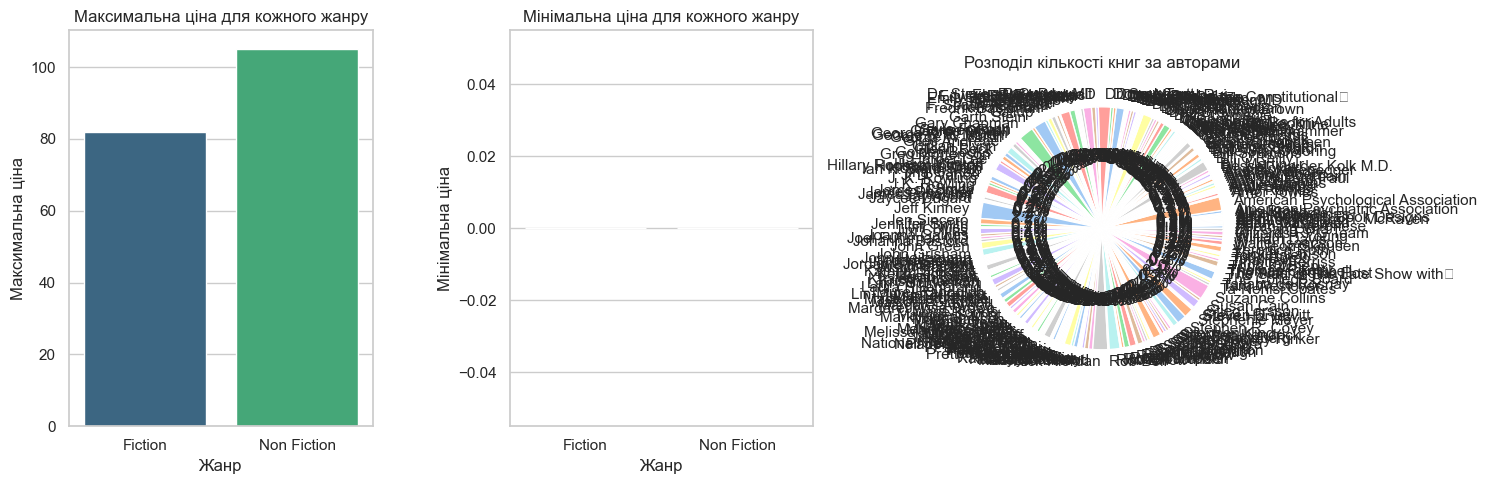

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


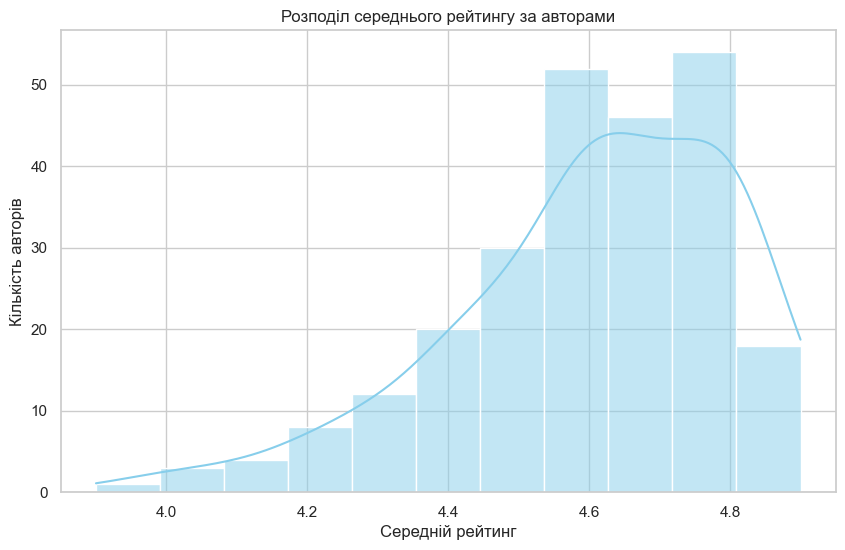

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Налаштування стилю та розміру графіків
sns.set(style="whitegrid")
plt.figure(figsize=(15, 5))

# 1. Графік для максимальної та мінімальної ціни для кожного жанру
plt.subplot(1, 3, 1)
sns.barplot(x=price_stats.index, y='max', data=price_stats, palette='viridis')
plt.title('Максимальна ціна для кожного жанру')
plt.xlabel('Жанр')
plt.ylabel('Максимальна ціна')

plt.subplot(1, 3, 2)
sns.barplot(x=price_stats.index, y='min', data=price_stats, palette='mako')
plt.title('Мінімальна ціна для кожного жанру')
plt.xlabel('Жанр')
plt.ylabel('Мінімальна ціна')

# 2. Графік для кількості книг для кожного автора
plt.subplot(1, 3, 3)
colors = sns.color_palette('pastel')[0:len(author_books_count)]
plt.pie(author_books_count['books_count'], labels=author_books_count.index, colors=colors, autopct='%1.1f%%')
plt.title('Розподіл кількості книг за авторами')

plt.tight_layout()
plt.show()

# 3. Графік для середнього рейтингу для кожного автора
plt.figure(figsize=(10, 6))
sns.histplot(author_avg_rating['avg_rating'], kde=True, color='skyblue')
plt.title('Розподіл середнього рейтингу за авторами')
plt.xlabel('Середній рейтинг')
plt.ylabel('Кількість авторів')
plt.show()
